# Probability Density Function

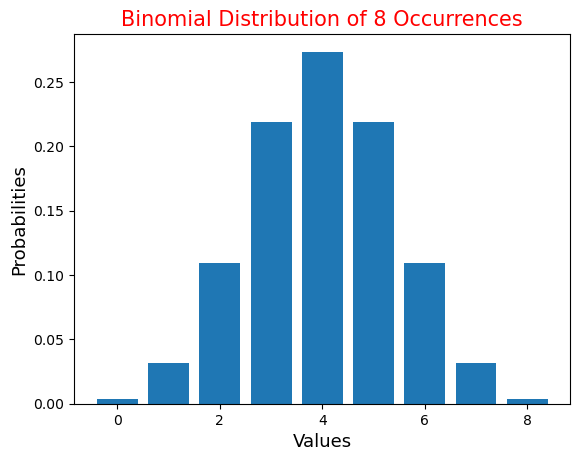

In [30]:
import scipy
from scipy.stats import binom 
import matplotlib.pyplot as plt 

# setting the values of n and p
n = 8                                           # number of times
p = 0.5                                         # binomial distribution with two outcomes (equal chances of success )

# defining list of r values 
r_values = list(range(n + 1)) 

# list of pmf values 
dist = [binom.pmf(r, n, p) for r in r_values ]  # pmf = Probability Mass Function

# plotting the graph  
plt.title(label="Binomial Distribution of 8 Occurrences", 
          fontsize=15, color="red")
plt.bar(r_values, dist)
plt.xlabel("Values",fontsize=13)
plt.ylabel("Probabilities",fontsize=13)
plt.show()

In [2]:
import math

''' Probability Density Function (PDF) from Scratch '''
def PDF(x, mean, std_dev):
    # first part of equation
    probability = 1.0 / math.sqrt(2 * 3.141592*(std_dev)**2)
    # multiply first part to second part
    probability *= math.exp(-0.5 * ((x - mean)/std_dev)**2)


    return probability

X = []

''' Create Fake Normally Distributed Data with Mean of 37, and Std_Dev of 2 '''
for x in range(29, 46):
    y = PDF(x, 37, 2)
    
    ''' Create fake data by replicating x according to it's probability '''
    N_vals_at_y = int(round(y * 1001, 0))
    for i in range(N_vals_at_y):
      X.append(x)


# Finding mean
mean = round(sum(X)/len(X), 4)


# Finding Standard Deviation
std_dev = 0.0
N = len(X)
for x in X:
  std_dev += (x - mean)**2

std_dev /= N
std_dev = math.sqrt(std_dev)
std_dev = round(std_dev, 2)

print(f'We fake measured the heights of {N} 1st graders.')
print(f'The mean is {mean}')
print(f'The standard deviation is {std_dev}')

We fake measured the heights of 1000 1st graders.
The mean is 37.0
The standard deviation is 1.99


In [3]:
x = 39
print(PDF(x, 37, 2))

0.12098537484471858


[29.0, 29.1, 29.200000000000003, 29.300000000000004, 29.400000000000006]
[6.691511288244267e-05, 8.162820438312129e-05, 9.93277356963869e-05, 0.0001205632901129977, 0.0001459734628957317]


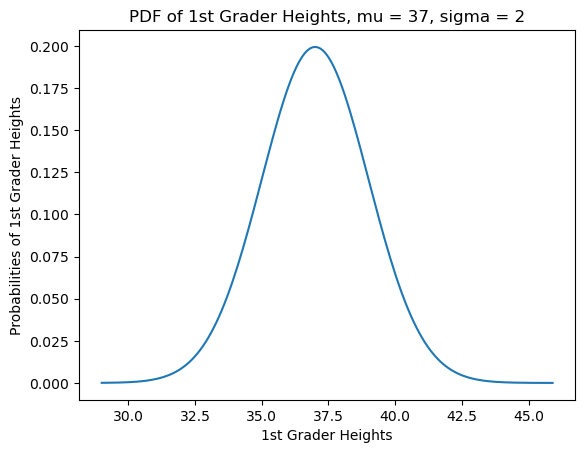

In [32]:
import scipy
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm

figure,ax = plt.subplots()
 
X = []
Y = []
 
for x in np.arange(29, 46, 0.1):
    X.append(x)
    y = norm.pdf(x=x, loc=37.0, scale=2)
    Y.append(y)
print(X[0:5])
print(Y[0:5])
ax.set_xlabel('1st Grader Heights')
ax.set_ylabel('Probabilities of 1st Grader Heights')
ax.set_title('PDF of 1st Grader Heights, mu = 37, sigma = 2')
plt.plot(X, Y)
plt.show()

If we want the probability for a specific height x = 39″, we only need to enter that specific value of x into the `norm.pdf` method.

In [34]:
x = 39
p = norm.pdf(x=x, loc=37, scale=2)
print(f"The probability of a 1st grader being '{x}' is {p}.")

The probability of a 1st grader being '39' is 0.12098536225957168.


# Standard Normal Distribution

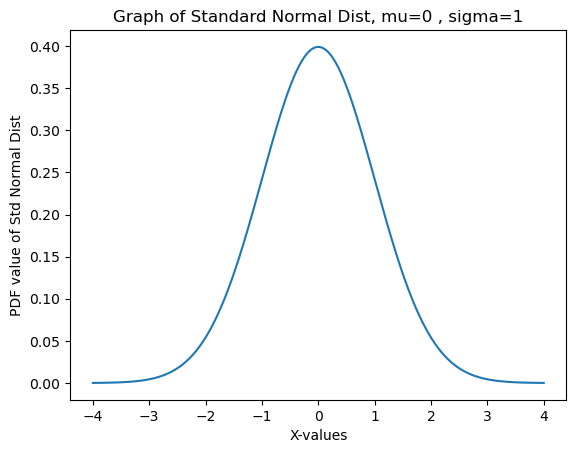

In [37]:
import scipy
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm

X = np.arange(-4, 4, 0.000001)        # X is an array of x's
Y = norm.pdf(x=X, loc=0, scale=1)  # Y is an array of probabilities
# mean = mu = loc = 0, standard deviation = sigma = scale = 1

plt.title('Graph of Standard Normal Dist, mu=0 , sigma=1')
plt.xlabel('X-values')
plt.ylabel('PDF value of Std Normal Dist')
plt.plot(X, Y)
plt.show()

# Cumulative Distribution Function (CDF)

We use the **PDF function** to calculate the height of each panel over the range of values needed for our integration calculation. We multiply each height by our constant width to calculate each panel area. We add all those panel areas together. **These combined mathematical steps constitute the CDF.** The code block below accomplishes these mathematical steps.

In [42]:
""" CDF of Normal Distribution without Numpy or Scipy """
import numpy as np  # only to get value of pi

'''Cumulative Distribution Function (CDF)'''
def CDF(mean=0, std_dev=1, x_left=-4, x_right=4, width=0.0001): # use domain -4<x<4 for visualization purposes
    CDF = 0
    print(x_right, x_left, width)
    ''' Call PDF for each value of x_left to x_right '''
    # calculate number of panels (+ 1 includes x_right)
    the_range = int((x_right - x_left) / width) + 1
    
    print("the_range value:",the_range)
    for i in range(the_range):
        x = x_left + i * width          # current x value
        y = PDF(x, mean, std_dev)       # probability of this panel
        panel = y * width               # this panel area under PDF curve
        CDF += panel                    # sum panel areas = CDF
      
    return CDF

In [43]:
text_1st = '1st Graders heights'
text_iqs = 'IQ scores'
values = [
    (text_iqs, 100, 15, 40, 160),
    (text_iqs, 100, 15, 40, 100),
    (text_iqs, 100, 15, 100, 160),
    (text_1st, 37, 2, 29, 45),
    (text_1st, 37, 2, 29, 37),
    (text_1st, 37, 2, 37, 45)]

for t in values:
    text = t[0]
    mean = t[1]
    std = t[2]
    lt = t[3]
    rt = t[4]
    cd_out = round(CDF(mean=mean, std_dev=std, 
                       x_left=lt, x_right=rt), 2)
    print(f'Probability of {text} being {lt} ≤ x ≤ {rt} is {cd_out}')

160 40 0.0001
the_range value: 1200001
Probability of IQ scores being 40 ≤ x ≤ 160 is 1.0
100 40 0.0001
the_range value: 600001
Probability of IQ scores being 40 ≤ x ≤ 100 is 0.5
160 100 0.0001
the_range value: 600001
Probability of IQ scores being 100 ≤ x ≤ 160 is 0.5
45 29 0.0001
the_range value: 160001
Probability of 1st Graders heights being 29 ≤ x ≤ 45 is 1.0
37 29 0.0001
the_range value: 80001
Probability of 1st Graders heights being 29 ≤ x ≤ 37 is 0.5
45 37 0.0001
the_range value: 80001
Probability of 1st Graders heights being 37 ≤ x ≤ 45 is 0.5


[29.     29.0001 29.0002 ... 45.9997 45.9998 45.9999]
[6.69151129e-05 6.69284972e-05 6.69418839e-05 ... 7.99726680e-06
 7.99546767e-06 7.99366892e-06]


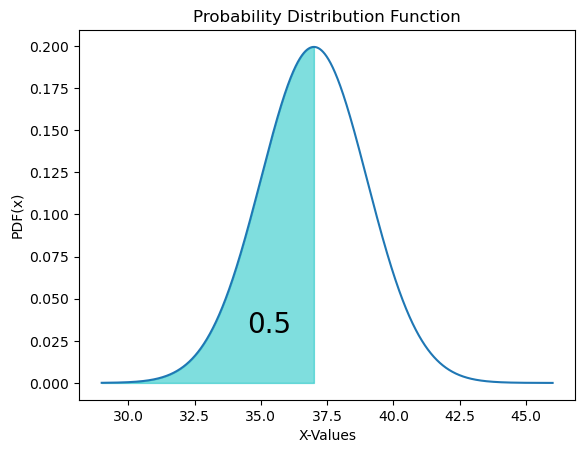

In [8]:
import scipy
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm

X = np.arange(29, 46, 0.0001)
print(X)
Y = norm.pdf(X, loc=37, scale=2)
print(Y)
plt.plot(X, Y)
plt.title("Probability Distribution Function")
plt.xlabel('X-Values')
plt.ylabel('PDF(x)')

# for fill_between
pX = np.arange(29, 37, 0.0001)                  # X values for fill
pY = norm.pdf(pX,loc=37, scale=2)               # Y values for fill
plt.fill_between(pX, pY, alpha=0.5, color='c')  # Fill method call

# for text
prob = round(norm.cdf(x=37, loc=37, scale=2),2)
plt.text(34.5, 0.03, prob, fontsize=20)         # Add text at position
plt.show()
     

## Find P(X < x)

In [9]:
from scipy.stats import norm

# P(X < 5)
less_than_5 = norm.cdf(x=5, loc=3, scale=2)
# loc = mean value, scale = standard deviation
print(less_than_5)

0.8413447460685429


The value 84.13% is the probability that the random variable is less than 5.

0.0004363413475228801 0.19947114020071635


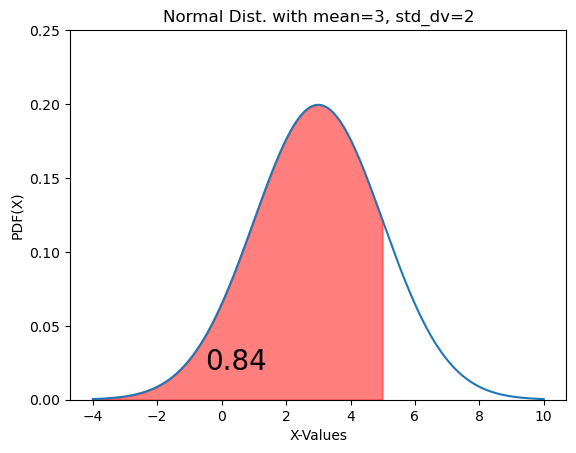

In [26]:
from matplotlib import pyplot as plt
import numpy as np
fig, ax = plt.subplots()

# for distribution curve
x = np.arange(-4, 10, 0.001)
print(norm.pdf(x, loc=3, scale=2).min(), norm.pdf(x, loc=3, scale=2).max())
ax.plot(x, norm.pdf(x, loc=3, scale=2))
ax.set_title("Normal Dist. with mean=3, std_dv=2")
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

# for fill_between
px=np.arange(-4,5, 0.01)              # X < 5
ax.set_ylim(0, 0.25)
ax.fill_between(px, norm.pdf(px, loc=3, scale=2), alpha=0.5, color='r')

# for text
ax.text(-0.5,0.02,round(less_than_5,2), fontsize=20)
plt.show()

## Find P(x1 < X < x2)

In [44]:
norm.cdf(5, 1, 2) - norm.cdf(0.2, 1, 2)

0.632671609662145

In [13]:
# P(0.2 < X < 5)
# mean = 1, standard deviation = 2

norm(1,2).cdf(5) - norm(1,2).cdf(0.2)

0.632671609662145

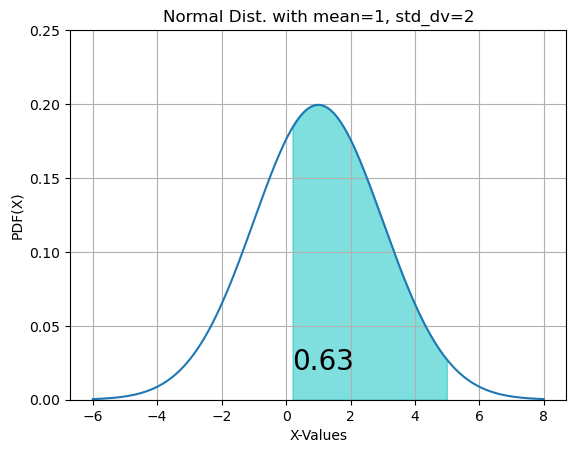

In [46]:
fig, ax = plt.subplots()

# for distribution curve
x= np.arange(-6,8,0.001)
ax.plot(x, norm.pdf(x,loc=1,scale=2))
ax.set_title("Normal Dist. with mean=1, std_dv=2")
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
ax.grid(True)

px=np.arange(0.2,5,0.01)              # 0.2 < X < 5
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=1,scale=2),alpha=0.5, color='c')

pro=norm(1,2).cdf(5) - norm(1,2).cdf(0.2)
ax.text(0.2,0.02,round(pro,2), fontsize=20)
plt.show()

## Find P(X > x)

To find the probability of P (X > x), we can use `norm.sf`, which is called the **survival function**, and it returns the same value as `1 – norm.cdf`.

In [15]:
# P(X > 3)
greater_than_3 = norm.sf(x=3, loc=4, scale=2)
greater_than_3

0.6914624612740131

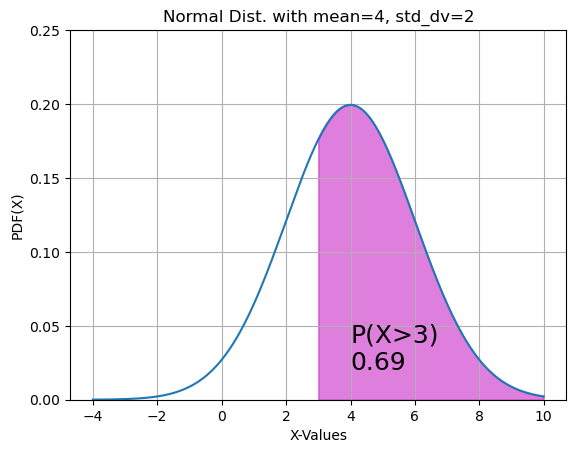

In [16]:
fig, ax = plt.subplots()
x= np.arange(-4, 10, 0.001)
ax.plot(x, norm.pdf(x, loc=4, scale=2))
ax.set_title("Normal Dist. with mean=4, std_dv=2")
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
ax.grid(True)

px=np.arange(3, 10, 0.01)              # X > 3
ax.set_ylim(0, 0.25)
ax.fill_between(px,norm.pdf(px, loc=4, scale=2), alpha=0.5, color='m')

ax.text(4, 0.02, "P(X>3)\n%.2f" %(greater_than_3), fontsize=18)
plt.show()

## Find 1 - P(X < 3) or P(X > 3)

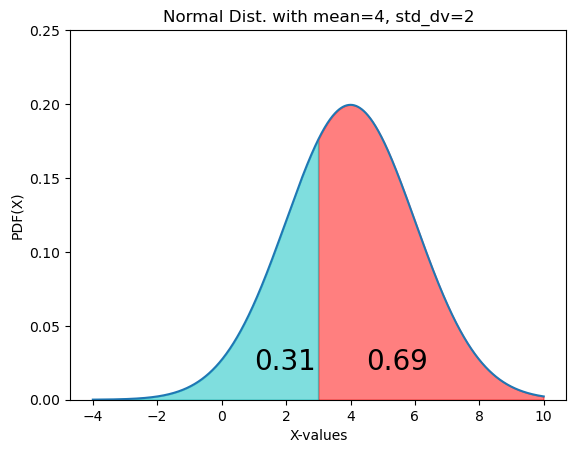

In [27]:
gr4 = norm.cdf(x=3, loc=4, scale=2)                    # P(X < 3)
gr14 = 1 - gr4                                         # 1 - P(X < 3)

fig, ax = plt.subplots()
x = np.arange(-4, 10, 0.001)
ax.plot(x, norm.pdf(x, loc=4, scale=2))
ax.set_title("Normal Dist. with mean=4, std_dv=2")
ax.set_xlabel('X-values')
ax.set_ylabel('PDF(X)')

# P(X < 3)
px = np.arange(3, 10, 0.01)
ax.set_ylim(0, 0.25)
ax.fill_between(px,norm.pdf(px, loc=4, scale=2), 
                alpha=0.5, color='r')

# P(X > 3)
px1 = np.arange(-4, 3, 0.01)
ax.fill_between(px1,norm.pdf(px1, loc=4, scale=2),
                alpha=0.5, color='c')

ax.text(4.5, 0.02, round(gr14, 2), fontsize=20)
ax.text(1, 0.02, round(gr4, 2), fontsize=20)
plt.show()